In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

### Step #1: Load and preprocess the data

In [3]:
# Load the data
df = pd.read_csv('housing.csv')
display(df.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# display the unique values in the ocean_proximity column
print(df['ocean_proximity'].unique())

# convert the ocean_proximity column to categorical
X1 = df.drop(['ocean_proximity', 'median_house_value'], axis=1)
X2 = pd.get_dummies(df['ocean_proximity'])
X = pd.concat([X1, X2], axis=1)
display(X.head())

# setup the target variable
y = df['median_house_value']
display(y.head())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0


0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

### Step 2: Use Random Forest and find feature importance with different sample_sixes

In [5]:
# Define sample sizes
sample_sizes = [1000, 2000, 5000, 10000, 15000, 20000]
feature_importance_dict = {col: [] for col in X.columns}
r2_scores = []
mse_scores = []

# Train models with different sample sizes
for size in sample_sizes:
    # Sample the data
    X_sample, _, y_sample, _ = train_test_split(X, y, train_size=size, random_state=42)
    
    # Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)
    
    # Train Random Forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    
    # Get predictions
    y_pred = rf.predict(X_test)
    
    # Store metrics
    r2_scores.append(r2_score(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    
    # Store feature importances
    for idx, importance in enumerate(rf.feature_importances_):
        feature_importance_dict[X.columns[idx]].append(importance)


In [6]:
# display the feature importance changes as 2 dimensional array
df_feature_importance = pd.DataFrame(index=sample_sizes)
for feature in X.columns:
    df_feature_importance[feature] = feature_importance_dict[feature]

display(df_feature_importance)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1000,0.055219,0.039776,0.081022,0.036470,0.041034,0.047333,0.042606,0.537326,0.002720,0.109451,0.000000,0.002030,0.005013
2000,0.066076,0.064972,0.071974,0.032312,0.032290,0.041161,0.025600,0.520169,0.002430,0.137654,0.000000,0.001357,0.004007
5000,0.079357,0.078309,0.066801,0.029646,0.028728,0.041907,0.023937,0.500080,0.002705,0.140293,0.000125,0.001766,0.006346
10000,0.096118,0.093343,0.055677,0.025820,0.025192,0.036931,0.020411,0.492343,0.002745,0.143611,0.000371,0.001571,0.005867
15000,0.102158,0.096575,0.056557,0.024626,0.027093,0.034895,0.019352,0.484728,0.003652,0.142189,0.000433,0.000758,0.006982
20000,0.108283,0.100593,0.053806,0.024767,0.022429,0.032637,0.019670,0.483300,0.003429,0.143113,0.000265,0.001074,0.006633


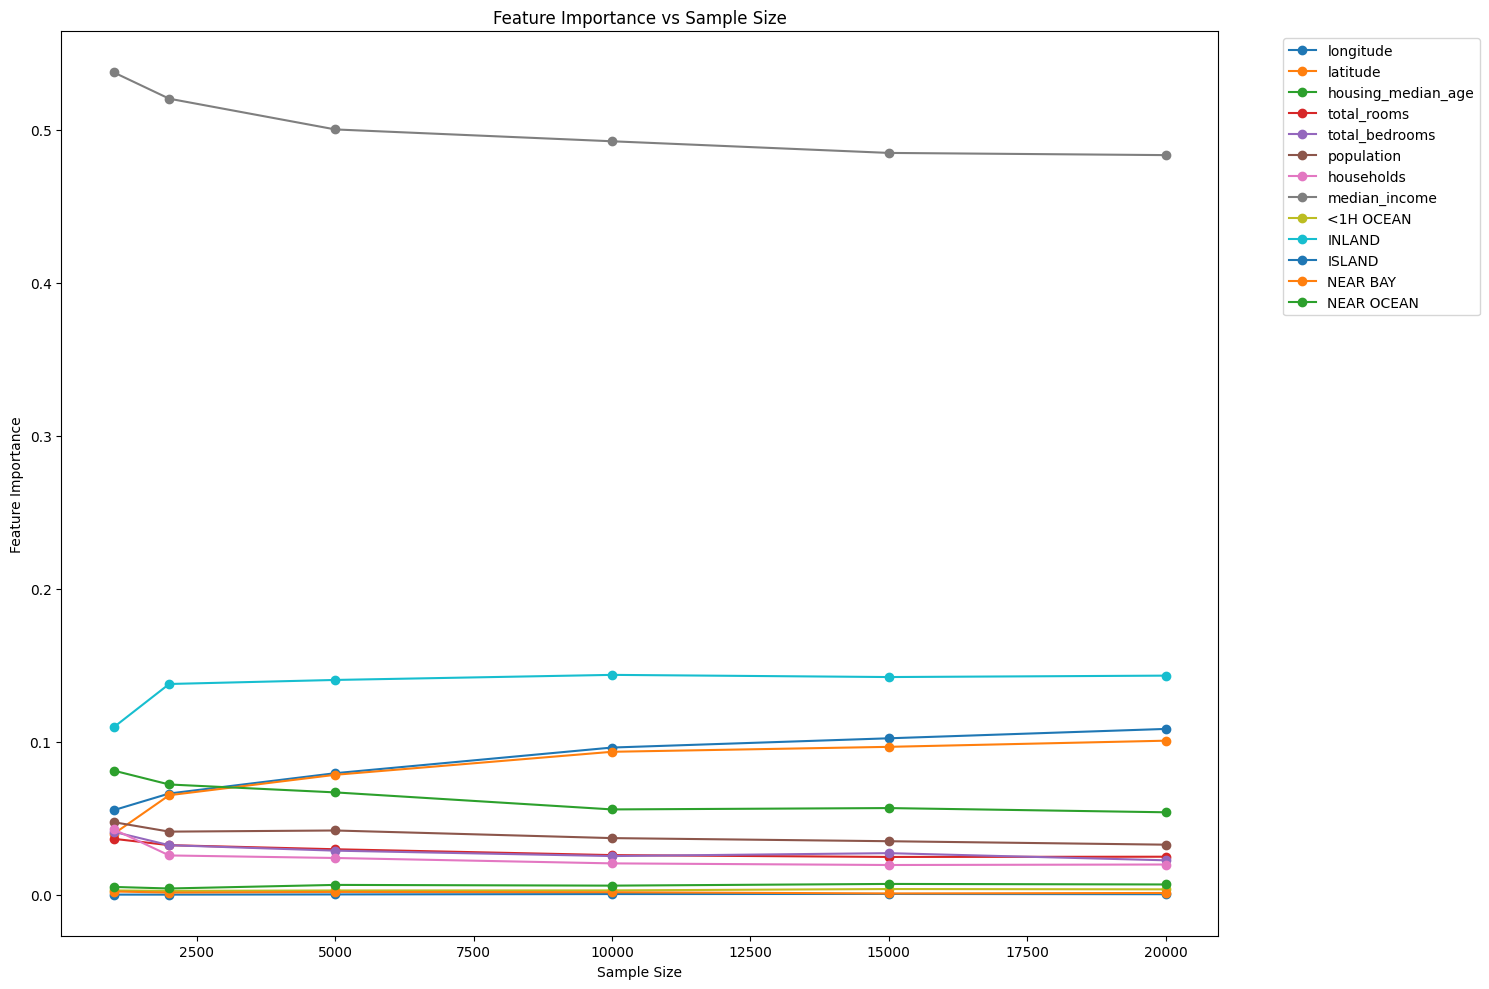

In [7]:
# Plot feature importance changes
plt.figure(figsize=(15, 10))
for feature in X.columns:
    plt.plot(sample_sizes, feature_importance_dict[feature], marker='o', label=feature)
plt.xlabel('Sample Size')
plt.ylabel('Feature Importance')
plt.title('Feature Importance vs Sample Size')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Initial Interpretation:

Based on the plot above, the biggest contributing factor to house prices is median income with about 50% feature importance. This is followed by INLAND, then lat-long. 

The number of samples didn't change the interpretation too much. It seems that 2500 samples should be enough representation for this dataset.

### Step #3: Now, let's try to interpret this using Shap.

In [30]:
!pip install xgboost shap --quiet


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


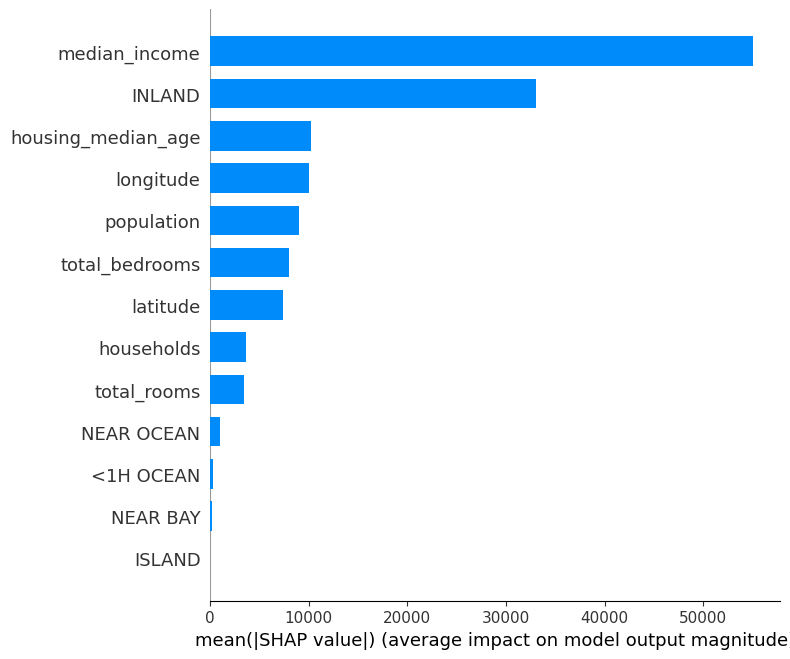

<Figure size 640x480 with 0 Axes>


Feature Importance based on SHAP values:


,Feature,SHAP_importance
7,median_income,55033.295512
9,INLAND,33015.329400
2,housing_median_age,10262.004351
0,longitude,10015.038354
5,population,8967.452651
4,total_bedrooms,8029.182330
1,latitude,7359.013548
6,households,3678.913019
3,total_rooms,3456.728168
12,NEAR OCEAN,1005.640610


In [8]:
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Lets limit the number of samples to 2500
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=2500, random_state=42)

# Train a Random Forest model on the full dataset
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Calculate SHAP values, use Tre
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.tight_layout()
plt.show()

# Calculate and display average absolute SHAP values for each feature
shap_importance = pd.DataFrame({
    'Feature': X.columns,
    'SHAP_importance': np.abs(shap_values).mean(0)
})
shap_importance = shap_importance.sort_values('SHAP_importance', ascending=False)
print("\nFeature Importance based on SHAP values:")
display(shap_importance.head(10))


### Interpretation

Key contributing factor is "median income". Followed by "INLAND", "housing median age", longitude, population.

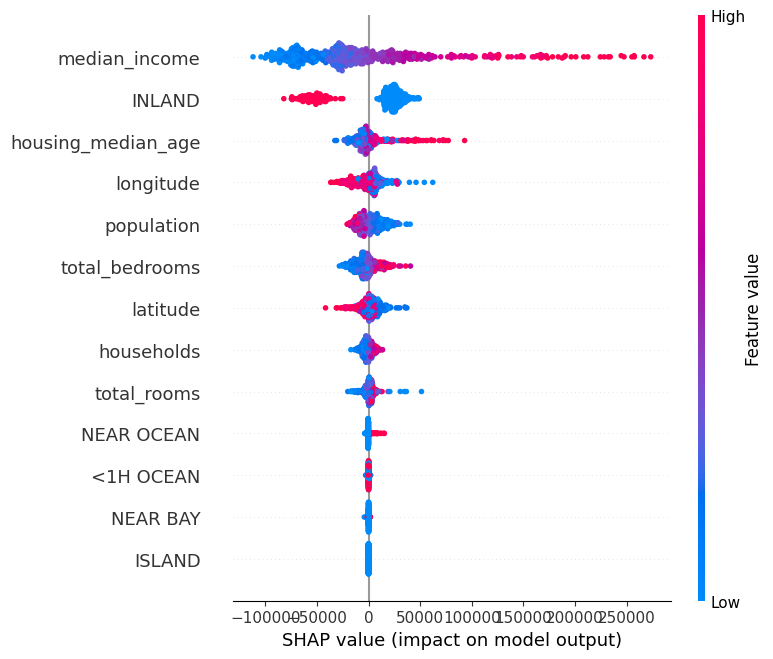

<Figure size 640x480 with 0 Axes>

In [9]:
# Plot detailed SHAP summary with feature values
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test)
plt.tight_layout()
plt.show()

### Interpretation

1. There is a large number of lower income houses, mostly in the same price range. But the prices are properties in high income houses are driving the price higher. So, there are fewer higher income than the majority but due to their expensive houses, they shift the average higher.
2. Inland houses are lower price. This means, near ocean are more expensive. But maybe distribution is biased so its not reflected in the SHAP.

Let's explore further.

### Let's analyze distribution of median income and ocean proximity

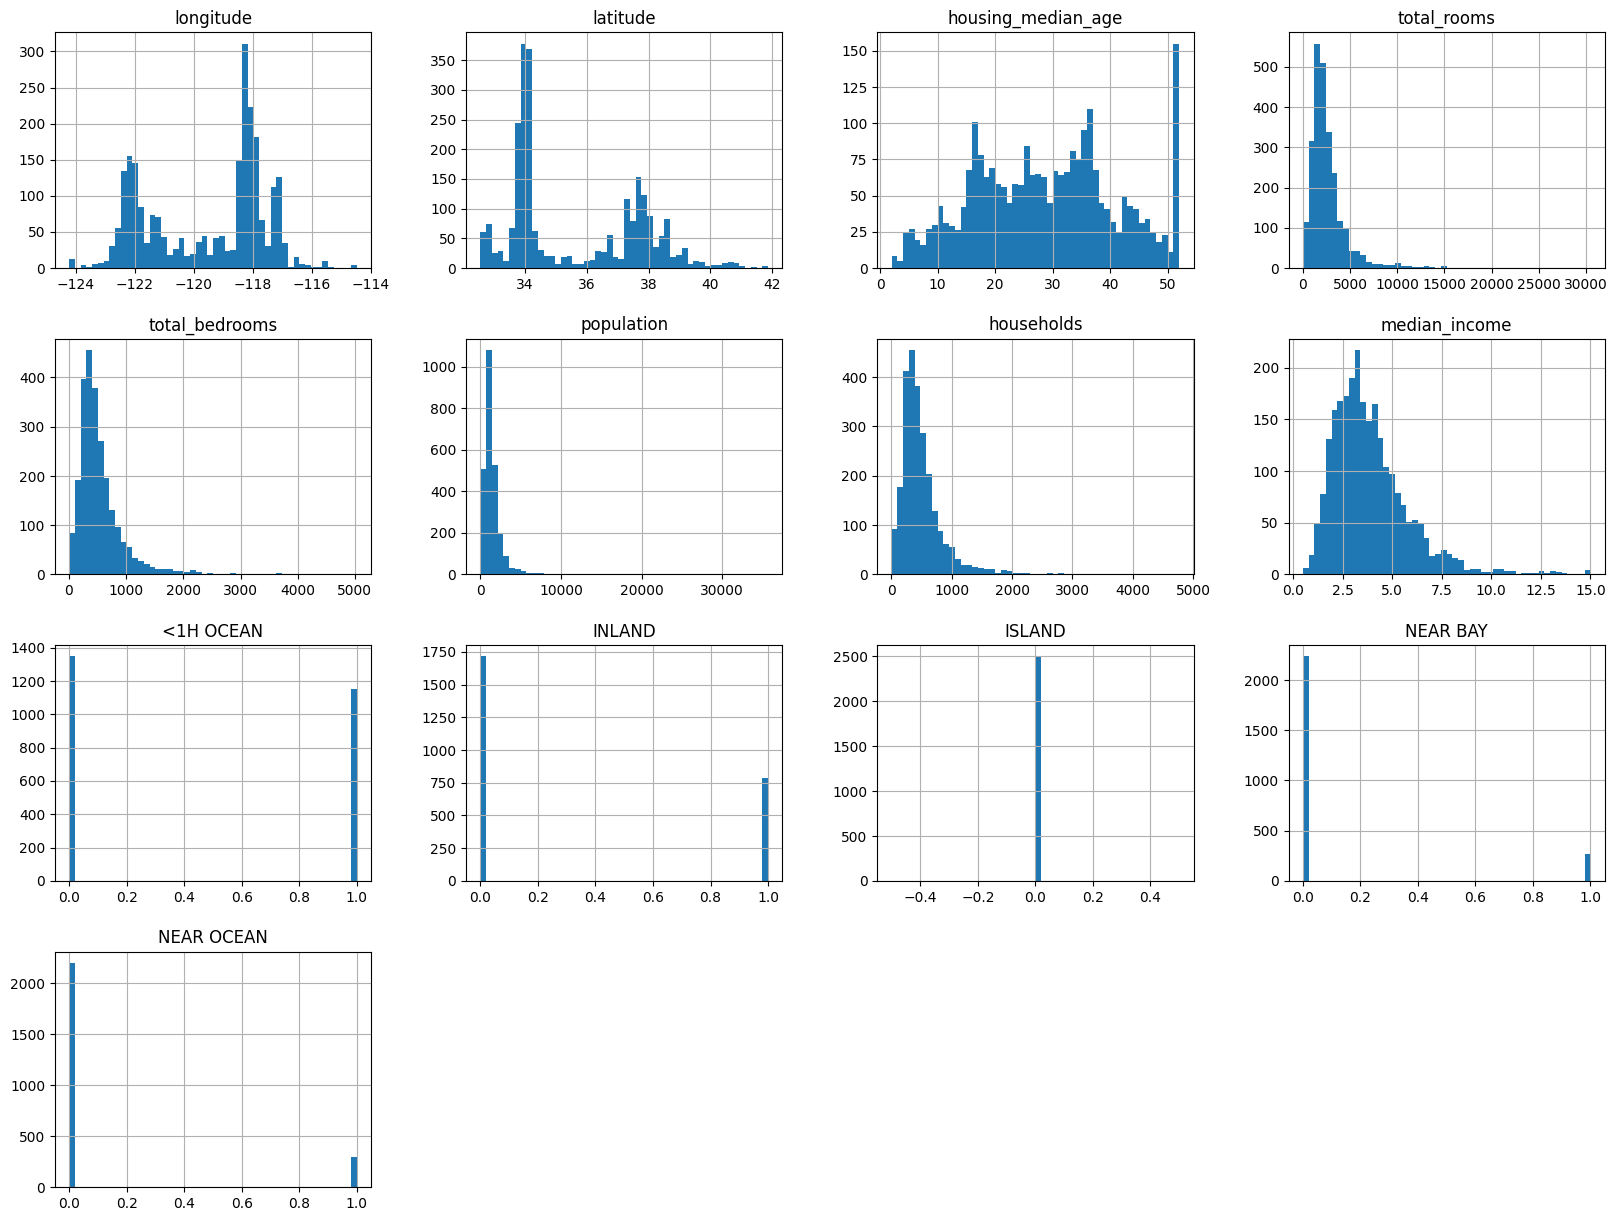

In [13]:

# Visualize data with histograms
X_sample.hist(bins=50, figsize=(20, 15))
plt.show()
